In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Read the data files
jeopardy_adult_df= pd.read_csv('master_season1-35.tsv', sep='\t',  infer_datetime_format=True, parse_dates=True, index_col='air_date')
jeopardy_adult_df



,round,value,daily_double,category,comments,answer,question,notes
air_date,,,,,,,,
1984-09-10,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,-
1984-09-10,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,-
1984-09-10,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,-
1984-09-10,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,-
1984-09-10,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,-
...,...,...,...,...,...,...,...,...
2019-07-26,2,400,no,MAKE IT SNAPPY,-,"As well as photosharing on this app, you can w...",Snapchat,-
2019-07-26,2,800,no,MAKE IT SNAPPY,-,"Genus Antirrhinum, these flowers snap closed a...",snapdragons,-
2019-07-26,2,1600,no,MAKE IT SNAPPY,-,This hyphenated tool company owns brands like ...,Snap-On,-


In [39]:
jeopardy_adult_df['1989':'1999'].groupby('category').count().sort_values('round', ascending=False)

,round,value,daily_double,comments,answer,question,notes
category,,,,,,,
LITERATURE,448,448,448,448,448,448,448
WORLD GEOGRAPHY,443,443,443,443,443,443,443
HISTORY,408,408,408,408,408,408,408
SCIENCE,399,399,399,399,399,399,399
AMERICAN HISTORY,398,398,398,398,398,398,398
...,...,...,...,...,...,...,...
ENTERTAINMENT HISTORY,1,1,1,1,1,1,1
ENTERTAINERS OF THE PAST,1,1,1,1,1,1,1
THE 1500s,1,1,1,1,1,1,1


In [26]:
# Counting unique number of categories
len(jeopardy_adult_df["category"].unique())

43369

In [27]:
# Counting number of categories in which Australia appears as the answer

jeopardy_adult_df.groupby("category").count().sort_values('round', ascending=False).head(10)

,round,value,daily_double,comments,answer,question,air_date,notes
category,,,,,,,,
SCIENCE,860,860,860,860,860,860,860,860
LITERATURE,814,814,814,814,814,814,814,814
AMERICAN HISTORY,788,788,788,788,788,788,788,788
HISTORY,720,720,720,720,720,720,720,720
SPORTS,701,701,701,701,701,701,701,701
POTPOURRI,699,699,699,699,699,699,699,699
BEFORE & AFTER,671,671,671,671,671,671,671,671
WORD ORIGINS,670,670,670,670,670,670,670,670
WORLD HISTORY,648,648,648,648,648,648,648,648


In [42]:
jeopardy_adult_df['2000':'2010'].groupby("question").count().sort_values('round', ascending=False).head(10)

,round,value,daily_double,category,comments,answer,notes
question,,,,,,,
China,151,151,151,151,151,151,151
Australia,142,142,142,142,142,142,142
Chicago,136,136,136,136,136,136,136
Japan,133,133,133,133,133,133,133
California,130,130,130,130,130,130,130
France,124,124,124,124,124,124,124
Canada,123,123,123,123,123,123,123
India,120,120,120,120,120,120,120
Italy,113,113,113,113,113,113,113


In [29]:
jeopardy_adult_df.groupby("answer").count().sort_values('round', ascending=False).head(10)

,round,value,daily_double,category,comments,question,air_date,notes
answer,,,,,,,,
Egypt,5,5,5,5,5,5,5,5
Hainan,4,4,4,4,4,4,4,4
Baffin Island,4,4,4,4,4,4,4,4
Brazil,4,4,4,4,4,4,4,4
Mount Kilimanjaro,4,4,4,4,4,4,4,4
Abigail Smith,4,4,4,4,4,4,4,4
Melanie Griffith,4,4,4,4,4,4,4,4
Walk like a duck,4,4,4,4,4,4,4,4
Argentina,4,4,4,4,4,4,4,4


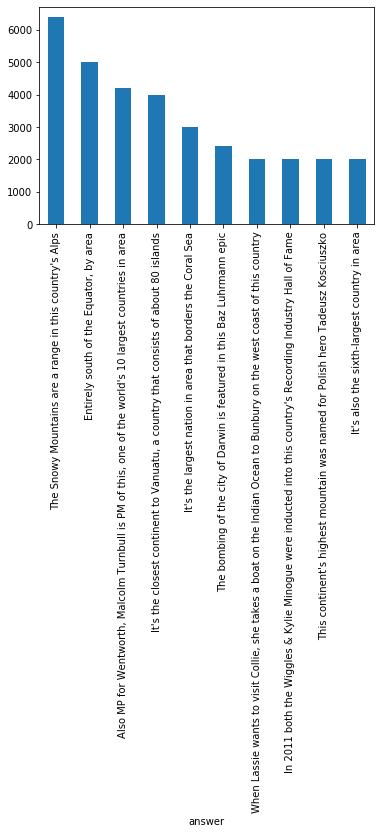

In [48]:
jeopardy_adult_df[jeopardy_adult_df['question']=='Australia'].groupby('answer').sum().sort_values('value', ascending=False).head(10)['value'].plot(kind='bar',rot=90)

In [16]:
jeopardy_adult_df[jeopardy_adult_df['question']=='Australia'].groupby('value').count().sort_values('round', ascending=False).head(10)

,round,daily_double,category,comments,answer,question,air_date,notes
value,,,,,,,,
400,81,81,81,81,81,81,81,81
200,63,63,63,63,63,63,63,63
800,46,46,46,46,46,46,46,46
1000,25,25,25,25,25,25,25,25
600,23,23,23,23,23,23,23,23
100,22,22,22,22,22,22,22,22
1200,17,17,17,17,17,17,17,17
1600,16,16,16,16,16,16,16,16
300,8,8,8,8,8,8,8,8


In [30]:
jeopardy_adult_df.head()

,round,value,daily_double,category,comments,answer,question,air_date,notes
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,1984-09-10,-
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,1984-09-10,-
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,-
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,-
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,1984-09-10,-
